In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import numpy as np
import re
import time
from selenium import webdriver

In [20]:
def get_soup(url):
    
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3) \
                AppleWebKit/537.36 (KHTML, like Gecko) \
                Chrome/58.0.3029.110 Safari/537.36'}
    
    response = requests.get(url, headers=headers)
    results = response.content
    if not response.status_code == 404:
        soup = BeautifulSoup(results, 'lxml')
    return soup

In [21]:
url_main = 'https://www.elliman.com/search/for-sale?sid=44458208'
apt_urls = get_soup(url_main).find_all('li', class_='listing_address first')

In [22]:
apt_url1 = 'https://www.elliman.com'+apt_urls[0].find('a')['href']
apt_url1

'https://www.elliman.com/new-york-city/12-east-63rd-street-manhattan-qjnryze'

In [14]:
from fake_useragent import UserAgent
ua = UserAgent()
ua.random

'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:21.0) Gecko/20130330 Firefox/21.0'

In [15]:
def random_user_agent():
    try:
        ua = UserAgent()
        return ua.random
    except:
        default_ua = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3) \
                AppleWebKit/537.36 (KHTML, like Gecko) \
                Chrome/58.0.3029.110 Safari/537.36'
        return default_ua

In [ ]:
def get_soup(url):
    
    headers = {'User-Agent': random_user_agent()}
    
    response = requests.get(url, headers=headers)
    results = response.content
    if not response.status_code == 404:
        soup = BeautifulSoup(results, 'lxml')
    return soup

2019-11-23 14:48:52,024 root   DEBUG    === Initialized Proxy Parsers ===
2019-11-23 14:48:52,025 root   DEBUG    	 FreeProxy parser of 'http://free-proxy-list.net' with required bandwidth: '150' KBs
2019-11-23 14:48:52,026 root   DEBUG    	 PremProxy parser of 'https://premproxy.com/list/' with required bandwidth: '150' KBs
2019-11-23 14:48:52,027 root   DEBUG    =================================
2019-11-23 14:48:52,396 root   DEBUG    Added 300 proxies from FreeProxy
2019-11-23 14:48:57,806 http_request_randomizer.requests.parsers.PremProxyParser DEBUG    Pages: {'', '14.htm', '18.htm', '15.htm', '07.htm', '12.htm', '11.htm', '05.htm', '04.htm', '16.htm', '06.htm', '09.htm', '10.htm', '08.htm', '13.htm', '03.htm', '02.htm', '17.htm'}
2019-11-23 14:49:03,289 http_request_randomizer.requests.parsers.js.UnPacker INFO     JS UnPacker init path: https://premproxy.com/js/e9147.js
2019-11-23 14:50:18,937 http_request_randomizer.requests.parsers.js.UnPacker DEBUG    portmap: {'rdab7': '8080'

Initialization took: 186.67650604248047 sec
Size: 1776
ALL = ['176.36.111.9:56323', '114.6.114.100:443', '105.19.49.179:80', '146.88.51.238:80', '170.247.152.132:43747', '190.249.158.128:44904', '83.17.171.250:57087', '159.138.3.119:80', '177.72.72.217:54468', '190.52.193.90:63141', '138.197.104.219:8080', '185.18.64.106:53281', '192.99.98.29:80', '159.8.114.37:8123', '91.234.127.222:53281', '197.159.12.167:51392', '182.191.84.39:80', '5.77.254.148:56955', '5.59.141.68:61602', '200.89.99.30:51619', '119.82.252.122:36182', '182.73.56.134:49235', '178.210.156.39:53281', '45.77.47.243:3128', '103.99.180.139:8080', '92.244.36.73:47150', '47.89.244.225:808', '136.228.128.164:53052', '195.234.87.211:53281', '85.223.157.204:40329', '213.216.48.9:42370', '177.184.66.13:8080', '103.112.130.18:53281', '69.65.65.178:59720', '125.27.251.57:41425', '103.250.157.39:35101', '179.60.127.45:60760', '111.92.164.249:30813', '180.250.247.124:23500', '45.232.152.112:31945', '113.53.91.12:53281', '223.30.19

RR Status 200
Proxied Request Took: 7.947301864624023 sec => Status: <Response [200]>
	 Response: ip=b'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n<!DOCTYPE HTML>\n\n<html lang="en" >\n<head>\n\n  \n  \n  \n\n\n\n\n\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n<meta http-equiv="x-dns-prefetch-control" content="on"/>\n\n<link rel="preconnect" href="https://images.static-century21.com/z/20191120184148/images" crossorigin/><link rel="dns-prefetch" href="https://images.static-century21.com/z/20191120184148/images"/><link rel="preconnect" href="https://css.static-century21.com/z/20191120184148/css" crossorigin/><link rel="dns-prefetch" href="https://css.static-century21.com/z/20191120184148/css"/><link rel="preconnect" href="https://js.static-century21.com/z/20191120184148/js" crossorigin/><link rel="dns-prefetch" href="https:

2019-11-23 14:52:16,660 root   DEBUG    Using headers: {'Connection': 'close', 'User-Agent': 'Mozilla/5.0 (Windows; U; Windows NT 6.0; en-US; rv:1.9.2.2) Gecko/20100316 Firefox/3.6.2 (.NET CLR 3.5.30729'}
2019-11-23 14:52:16,661 root   DEBUG    Using proxy: 91.144.20.192:8080 | PremProxy
2019-11-23 14:52:46,670 root   DEBUG    Proxy unreachable - Removed Straggling proxy: 91.144.20.192:8080 | PremProxy PL Size = 1775


Proxied Request Took: 30.01485323905945 sec => Status: None
Proxy List Size: 1775
-> Going to sleep..


2019-11-23 14:52:56,678 root   DEBUG    Using headers: {'Connection': 'close', 'User-Agent': 'Mozilla/5.0 (Linux i686; U; en; rv:1.9.1.6) Gecko/20091201 Firefox/3.5.6 Opera 10.5'}
2019-11-23 14:52:56,679 root   DEBUG    Using proxy: 154.66.109.93:41537 | PremProxy
2019-11-23 14:53:28,097 root   DEBUG    Proxy unreachable - Removed Straggling proxy: 154.66.109.93:41537 | PremProxy PL Size = 1774


Proxied Request Took: 31.423989057540894 sec => Status: None
Proxy List Size: 1774
-> Going to sleep..


2019-11-23 14:53:38,103 root   DEBUG    Using headers: {'Connection': 'close', 'User-Agent': 'Mozilla/5.0 (X11; U; Linux x86_64; pt-BR; rv:1.9.2.10) Gecko/20100922 Ubuntu/10.10 (maverick) Firefox/3.6.1'}
2019-11-23 14:53:38,104 root   DEBUG    Using proxy: 103.54.133.89:80 | PremProxy
2019-11-23 14:53:43,966 root   DEBUG    Proxy unreachable - Removed Straggling proxy: 103.54.133.89:80 | PremProxy PL Size = 1773


Proxied Request Took: 5.867677927017212 sec => Status: None
Proxy List Size: 1773
-> Going to sleep..


2019-11-23 14:53:53,975 root   DEBUG    Using headers: {'Connection': 'close', 'User-Agent': 'Mozilla/5.0 (X11; U; Linux i686; fr-FR; rv:1.9.2.10) Gecko/20100914 Firefox/3.6.1'}
2019-11-23 14:53:53,976 root   DEBUG    Using proxy: 5.129.61.30:53728 | PremProxy
2019-11-23 14:54:47,613 root   DEBUG    Read timed out - Removed Straggling proxy: 5.129.61.30:53728 | PremProxy PL Size = 1772


Proxied Request Took: 53.64285898208618 sec => Status: None
Proxy List Size: 1772
-> Going to sleep..


2019-11-23 14:54:57,620 root   DEBUG    Using headers: {'Connection': 'close', 'User-Agent': 'Mozilla/5.0 (X11; U; Linux i686; en-US; rv:1.9.2.10pre) Gecko/20100902 Ubuntu/9.10 (karmic) Firefox/3.6.1pr'}
2019-11-23 14:54:57,621 root   DEBUG    Using proxy: 41.87.29.130:8080 | PremProxy
2019-11-23 14:55:32,482 root   DEBUG    Read timed out - Removed Straggling proxy: 41.87.29.130:8080 | PremProxy PL Size = 1771


Proxied Request Took: 34.865787982940674 sec => Status: None
Proxy List Size: 1771
-> Going to sleep..


2019-11-23 14:55:42,488 root   DEBUG    Using headers: {'Connection': 'close', 'User-Agent': 'Mozilla/5.0 (X11; U; Linux x86_64; de; rv:1.9.2.10) Gecko/20100922 Ubuntu/10.10 (maverick) Firefox/3.6.10 GTB7.'}
2019-11-23 14:55:42,489 root   DEBUG    Using proxy: 183.88.111.198:8080 | FreeProxy


RR Status 200
Proxied Request Took: 10.203428745269775 sec => Status: <Response [200]>
	 Response: ip=b'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n<!DOCTYPE HTML>\n\n<html lang="en" >\n<head>\n\n  \n  \n  \n\n\n\n\n\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n<meta http-equiv="x-dns-prefetch-control" content="on"/>\n\n<link rel="preconnect" href="https://images.static-century21.com/z/20191120184148/images" crossorigin/><link rel="dns-prefetch" href="https://images.static-century21.com/z/20191120184148/images"/><link rel="preconnect" href="https://css.static-century21.com/z/20191120184148/css" crossorigin/><link rel="dns-prefetch" href="https://css.static-century21.com/z/20191120184148/css"/><link rel="preconnect" href="https://js.static-century21.com/z/20191120184148/js" crossorigin/><link rel="dns-prefetch" href="https

2019-11-23 14:56:02,696 root   DEBUG    Using headers: {'Connection': 'close', 'User-Agent': 'Mozilla/5.0 (Windows; U; Windows NT 6.1; zh-CN; rv:1.9.2.3) Gecko/20100401 Firefox/3.6.3 (.NET CLR 3.5.30729'}
2019-11-23 14:56:02,697 root   DEBUG    Using proxy: 194.44.246.210:8080 | FreeProxy
2019-11-23 14:56:12,703 root   DEBUG    Proxy unreachable - Removed Straggling proxy: 194.44.246.210:8080 | FreeProxy PL Size = 1770


Proxied Request Took: 10.009891033172607 sec => Status: None
Proxy List Size: 1770
-> Going to sleep..


2019-11-23 14:56:22,709 root   DEBUG    Using headers: {'Connection': 'close', 'User-Agent': 'Mozilla/5.0 (Linux i686; U; en; rv:1.9.1.6) Gecko/20091201 Firefox/3.5.6 Opera 10.5'}
2019-11-23 14:56:22,710 root   DEBUG    Using proxy: 41.139.9.47:8080 | PremProxy


RR Status 200
Proxied Request Took: 20.0526020526886 sec => Status: <Response [200]>
	 Response: ip=b'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n<!DOCTYPE HTML>\n\n<html lang="en" >\n<head>\n\n  \n  \n  \n\n\n\n\n\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n<meta http-equiv="x-dns-prefetch-control" content="on"/>\n\n<link rel="preconnect" href="https://images.static-century21.com/z/20191120184148/images" crossorigin/><link rel="dns-prefetch" href="https://images.static-century21.com/z/20191120184148/images"/><link rel="preconnect" href="https://css.static-century21.com/z/20191120184148/css" crossorigin/><link rel="dns-prefetch" href="https://css.static-century21.com/z/20191120184148/css"/><link rel="preconnect" href="https://js.static-century21.com/z/20191120184148/js" crossorigin/><link rel="dns-prefetch" href="https:/

2019-11-23 14:56:52,772 root   DEBUG    Using headers: {'Connection': 'close', 'User-Agent': 'Mozilla/5.0 (X11; U; Linux i686; de; rv:1.9.1.6) Gecko/20091201 SUSE/3.5.6-1.1.1 Firefox/3.5.'}
2019-11-23 14:56:52,773 root   DEBUG    Using proxy: 105.19.49.183:80 | PremProxy
2019-11-23 14:56:58,635 root   DEBUG    Proxy unreachable - Removed Straggling proxy: 105.19.49.183:80 | PremProxy PL Size = 1769


Proxied Request Took: 5.8681480884552 sec => Status: None
Proxy List Size: 1769
-> Going to sleep..


2019-11-23 14:57:08,640 root   DEBUG    Using headers: {'Connection': 'close', 'User-Agent': 'Opera/9.80 (X11; Linux i686; U; en) Presto/2.5.27 Version/10.6'}
2019-11-23 14:57:08,641 root   DEBUG    Using proxy: 203.150.128.200:8080 | PremProxy


RR Status 200
Proxied Request Took: 9.347935914993286 sec => Status: <Response [200]>
	 Response: ip=b'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n<!DOCTYPE HTML>\n\n<html lang="en" >\n<head>\n\n  \n  \n  \n\n\n\n\n\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n<meta http-equiv="x-dns-prefetch-control" content="on"/>\n\n<link rel="preconnect" href="https://images.static-century21.com/z/20191120184148/images" crossorigin/><link rel="dns-prefetch" href="https://images.static-century21.com/z/20191120184148/images"/><link rel="preconnect" href="https://css.static-century21.com/z/20191120184148/css" crossorigin/><link rel="dns-prefetch" href="https://css.static-century21.com/z/20191120184148/css"/><link rel="preconnect" href="https://js.static-century21.com/z/20191120184148/js" crossorigin/><link rel="dns-prefetch" href="https:

2019-11-23 14:57:27,998 root   DEBUG    Using headers: {'Connection': 'close', 'User-Agent': 'Opera/9.80 (Linux i686; U; en) Presto/2.5.22 Version/10.5'}
2019-11-23 14:57:27,999 root   DEBUG    Using proxy: 173.212.196.163:8000 | PremProxy
2019-11-23 14:57:58,159 root   DEBUG    Proxy unreachable - Removed Straggling proxy: 173.212.196.163:8000 | PremProxy PL Size = 1768


Proxied Request Took: 30.166433095932007 sec => Status: None
Proxy List Size: 1768
-> Going to sleep..


2019-11-23 14:58:08,164 root   DEBUG    Using headers: {'Connection': 'close', 'User-Agent': 'Mozilla/5.0 (X11; U; Linux x86_64; en-US; rv:1.9.2.6) Gecko/20100628 Ubuntu/10.04 (lucid) Firefox/3.6.'}
2019-11-23 14:58:08,164 root   DEBUG    Using proxy: 202.179.7.158:23500 | PremProxy


RR Status 200
Proxied Request Took: 26.11331582069397 sec => Status: <Response [200]>
	 Response: ip=b'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n<!DOCTYPE HTML>\n\n<html lang="en" >\n<head>\n\n  \n  \n  \n\n\n\n\n\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n<meta http-equiv="x-dns-prefetch-control" content="on"/>\n\n<link rel="preconnect" href="https://images.static-century21.com/z/20191120184148/images" crossorigin/><link rel="dns-prefetch" href="https://images.static-century21.com/z/20191120184148/images"/><link rel="preconnect" href="https://css.static-century21.com/z/20191120184148/css" crossorigin/><link rel="dns-prefetch" href="https://css.static-century21.com/z/20191120184148/css"/><link rel="preconnect" href="https://js.static-century21.com/z/20191120184148/js" crossorigin/><link rel="dns-prefetch" href="https:

2019-11-23 14:58:44,287 root   DEBUG    Using headers: {'Connection': 'close', 'User-Agent': 'Opera/9.80 (Windows NT 5.1; U; ru) Presto/2.2.15 Version/10.0'}
2019-11-23 14:58:44,288 root   DEBUG    Using proxy: 170.246.84.30:3128 | FreeProxy


RR Status 200
Proxied Request Took: 6.578949689865112 sec => Status: <Response [200]>
	 Response: ip=b'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n<!DOCTYPE HTML>\n\n<html lang="en" >\n<head>\n\n  \n  \n  \n\n\n\n\n\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n<meta http-equiv="x-dns-prefetch-control" content="on"/>\n\n<link rel="preconnect" href="https://images.static-century21.com/z/20191120184148/images" crossorigin/><link rel="dns-prefetch" href="https://images.static-century21.com/z/20191120184148/images"/><link rel="preconnect" href="https://css.static-century21.com/z/20191120184148/css" crossorigin/><link rel="dns-prefetch" href="https://css.static-century21.com/z/20191120184148/css"/><link rel="preconnect" href="https://js.static-century21.com/z/20191120184148/js" crossorigin/><link rel="dns-prefetch" href="https:

2019-11-23 14:59:00,873 root   DEBUG    Using headers: {'Connection': 'close', 'User-Agent': 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US) AppleWebKit/534.7 (KHTML, like Gecko) Chrome/7.0.514.0 Safari/534.'}
2019-11-23 14:59:00,874 root   DEBUG    Using proxy: 212.3.208.252:30091 | PremProxy


RR Status 200
Proxied Request Took: 9.352307081222534 sec => Status: <Response [200]>
	 Response: ip=b'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n<!DOCTYPE HTML>\n\n<html lang="en" >\n<head>\n\n  \n  \n  \n\n\n\n\n\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n<meta http-equiv="x-dns-prefetch-control" content="on"/>\n\n<link rel="preconnect" href="https://images.static-century21.com/z/20191120184148/images" crossorigin/><link rel="dns-prefetch" href="https://images.static-century21.com/z/20191120184148/images"/><link rel="preconnect" href="https://css.static-century21.com/z/20191120184148/css" crossorigin/><link rel="dns-prefetch" href="https://css.static-century21.com/z/20191120184148/css"/><link rel="preconnect" href="https://js.static-century21.com/z/20191120184148/js" crossorigin/><link rel="dns-prefetch" href="https:

2019-11-23 14:59:20,234 root   DEBUG    Using headers: {'Connection': 'close', 'User-Agent': 'Mozilla/5.0 (X11; U; Linux x86_64; en-US; rv:1.9.2.6) Gecko/20100628 Ubuntu/10.04 (lucid) Firefox/3.6.6 GTB7.'}
2019-11-23 14:59:20,235 root   DEBUG    Using proxy: 186.167.33.244:42550 | PremProxy
2019-11-23 14:59:50,242 root   DEBUG    Proxy unreachable - Removed Straggling proxy: 186.167.33.244:42550 | PremProxy PL Size = 1767


Proxied Request Took: 30.01242709159851 sec => Status: None
Proxy List Size: 1767
-> Going to sleep..


2019-11-23 15:00:00,248 root   DEBUG    Using headers: {'Connection': 'close', 'User-Agent': 'Mozilla/5.0 (X11; U; CrOS i686 0.9.128; en-US) AppleWebKit/534.10 (KHTML, like Gecko) Chrome/8.0.552.341 Safari/534.1'}
2019-11-23 15:00:00,249 root   DEBUG    Using proxy: 113.53.91.12:53281 | FreeProxy
2019-11-23 15:00:30,270 root   DEBUG    Proxy unreachable - Removed Straggling proxy: 113.53.91.12:53281 | FreeProxy PL Size = 1766


Proxied Request Took: 30.025372982025146 sec => Status: None
Proxy List Size: 1766
-> Going to sleep..


2019-11-23 15:00:40,276 root   DEBUG    Using headers: {'Connection': 'close', 'User-Agent': 'Mozilla/5.0 (Windows; U; Windows NT 6.0; en-US; rv:1.9.1.3) Gecko/20090824 Firefox/3.5.3 (.NET CLR 2.0.50727; .NET CLR 3.0.30618; .NET CLR 3.5.21022; .NET CLR 3.5.30729'}
2019-11-23 15:00:40,276 root   DEBUG    Using proxy: 157.230.245.7:8080 | PremProxy


RR Status 405
Proxied Request Took: 2.9244320392608643 sec => Status: <Response [405]>
	 Response: ip=b'<html>\n  <head>\n    <style type="text/css">\n    input[type="submit"] {\n        margin: 43px 0 74px;\n        padding: 10px 16px;\n        line-height: 1.33;\n        font-size: 14px;\n        font-weight: 400;\n        text-transform: uppercase;\n        color: #FFF;\n        background: #555;\n        border: solid #555;\n        border-width: 0 0 2px 0;\n        border-radius: 2px;\n        transition: all 200ms;\n    }\n        table table {\n      width: 600px !important;\n    }\n    table div { /* logo */\n      width: 100%;\n      float: none;\n      text-align: center;\n    }\n    table div + div { /* main content */\n      width: 100%;\n      float: left;\n      text-align: left;\n    }\n    table div + div + div { /* trace */\n      width: 100%;\n      float: left;\n      text-align: left;\n    }\n    table div + div + div + div { /* footer */\n      width: 100%;\n      
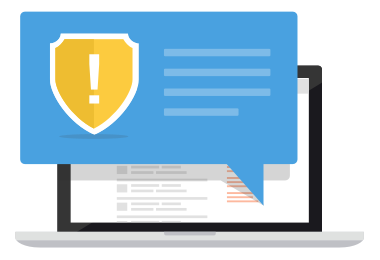

2019-11-23 15:00:53,206 root   DEBUG    Using headers: {'Connection': 'close', 'User-Agent': 'Mozilla/5.0 (X11; U; Linux i686; es-AR; rv:1.9.1.8) Gecko/20100214 Ubuntu/9.10 (karmic) Firefox/3.5.'}
2019-11-23 15:00:53,207 root   DEBUG    Using proxy: 58.8.65.113:8213 | FreeProxy
2019-11-23 15:01:23,215 root   DEBUG    Proxy unreachable - Removed Straggling proxy: 58.8.65.113:8213 | FreeProxy PL Size = 1765


Proxied Request Took: 30.01400899887085 sec => Status: None
Proxy List Size: 1765
-> Going to sleep..


2019-11-23 15:01:33,220 root   DEBUG    Using headers: {'Connection': 'close', 'User-Agent': 'Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6_4; th-th) AppleWebKit/533.17.8 (KHTML, like Gecko) Version/5.0.1 Safari/533.17.'}
2019-11-23 15:01:33,221 root   DEBUG    Using proxy: 203.176.135.98:51997 | PremProxy


RR Status 200
Proxied Request Took: 7.117006063461304 sec => Status: <Response [200]>
	 Response: ip=b'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n<!DOCTYPE HTML>\n\n<html lang="en" >\n<head>\n\n  \n  \n  \n\n\n\n\n\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n<meta http-equiv="x-dns-prefetch-control" content="on"/>\n\n<link rel="preconnect" href="https://images.static-century21.com/z/20191120184148/images" crossorigin/><link rel="dns-prefetch" href="https://images.static-century21.com/z/20191120184148/images"/><link rel="preconnect" href="https://css.static-century21.com/z/20191120184148/css" crossorigin/><link rel="dns-prefetch" href="https://css.static-century21.com/z/20191120184148/css"/><link rel="preconnect" href="https://js.static-century21.com/z/20191120184148/js" crossorigin/><link rel="dns-prefetch" href="https:

2019-11-23 15:01:50,344 root   DEBUG    Using headers: {'Connection': 'close', 'User-Agent': 'Opera/9.80 (Windows NT 6.1; U; fi) Presto/2.2.15 Version/10.0'}
2019-11-23 15:01:50,345 root   DEBUG    Using proxy: 138.121.136.153:8080 | FreeProxy
2019-11-23 15:02:20,353 root   DEBUG    Proxy unreachable - Removed Straggling proxy: 138.121.136.153:8080 | FreeProxy PL Size = 1764


Proxied Request Took: 30.011663913726807 sec => Status: None
Proxy List Size: 1764
-> Going to sleep..


2019-11-23 15:02:30,361 root   DEBUG    Using headers: {'Connection': 'close', 'User-Agent': 'Mozilla/5.0 (X11; U; Linux i686; en-GB; rv:1.9.2.16) Gecko/20110319 Firefox/3.6.1'}
2019-11-23 15:02:30,361 root   DEBUG    Using proxy: 210.5.106.202:37020 | PremProxy


RR Status 200
Proxied Request Took: 10.044373989105225 sec => Status: <Response [200]>
	 Response: ip=b'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n<!DOCTYPE HTML>\n\n<html lang="en" >\n<head>\n\n  \n  \n  \n\n\n\n\n\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n<meta http-equiv="x-dns-prefetch-control" content="on"/>\n\n<link rel="preconnect" href="https://images.static-century21.com/z/20191120184148/images" crossorigin/><link rel="dns-prefetch" href="https://images.static-century21.com/z/20191120184148/images"/><link rel="preconnect" href="https://css.static-century21.com/z/20191120184148/css" crossorigin/><link rel="dns-prefetch" href="https://css.static-century21.com/z/20191120184148/css"/><link rel="preconnect" href="https://js.static-century21.com/z/20191120184148/js" crossorigin/><link rel="dns-prefetch" href="https

2019-11-23 15:02:50,411 root   DEBUG    Using headers: {'Connection': 'close', 'User-Agent': 'Opera/9.80 (Windows NT 6.1; U; ko) Presto/2.7.62 Version/11.0'}
2019-11-23 15:02:50,412 root   DEBUG    Using proxy: 179.60.127.45:60760 | FreeProxy


RR Status 200
Proxied Request Took: 29.463345289230347 sec => Status: <Response [200]>
	 Response: ip=b'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n<!DOCTYPE HTML>\n\n<html lang="en" >\n<head>\n\n  \n  \n  \n\n\n\n\n\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n<meta http-equiv="x-dns-prefetch-control" content="on"/>\n\n<link rel="preconnect" href="https://images.static-century21.com/z/20191120184148/images" crossorigin/><link rel="dns-prefetch" href="https://images.static-century21.com/z/20191120184148/images"/><link rel="preconnect" href="https://css.static-century21.com/z/20191120184148/css" crossorigin/><link rel="dns-prefetch" href="https://css.static-century21.com/z/20191120184148/css"/><link rel="preconnect" href="https://js.static-century21.com/z/20191120184148/js" crossorigin/><link rel="dns-prefetch" href="https

2019-11-23 15:03:29,881 root   DEBUG    Using headers: {'Connection': 'close', 'User-Agent': 'Mozilla/5.0 (Windows; U; Windows NT 5.1; ja; rv:1.9.2a1pre) Gecko/20090402 Firefox/3.6a1pre (.NET CLR 3.5.30729'}
2019-11-23 15:03:29,882 root   DEBUG    Using proxy: 212.98.159.196:8080 | PremProxy


RR Status 200
Proxied Request Took: 30.753709077835083 sec => Status: <Response [200]>
	 Response: ip=b'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n<!DOCTYPE HTML>\n\n<html lang="en" >\n<head>\n\n  \n  \n  \n\n\n\n\n\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n<meta http-equiv="x-dns-prefetch-control" content="on"/>\n\n<link rel="preconnect" href="https://images.static-century21.com/z/20191120184148/images" crossorigin/><link rel="dns-prefetch" href="https://images.static-century21.com/z/20191120184148/images"/><link rel="preconnect" href="https://css.static-century21.com/z/20191120184148/css" crossorigin/><link rel="dns-prefetch" href="https://css.static-century21.com/z/20191120184148/css"/><link rel="preconnect" href="https://js.static-century21.com/z/20191120184148/js" crossorigin/><link rel="dns-prefetch" href="https

2019-11-23 15:04:10,642 root   DEBUG    Using headers: {'Connection': 'close', 'User-Agent': 'Mozilla/5.0 (Windows; U; Windows NT 6.0; ru; rv:1.9.2) Gecko/20100115 Firefox/3.'}
2019-11-23 15:04:10,643 root   DEBUG    Using proxy: 79.115.245.227:8080 | PremProxy


RR Status 200
Proxied Request Took: 30.114930868148804 sec => Status: <Response [200]>
	 Response: ip=b'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n<!DOCTYPE HTML>\n\n<html lang="en" >\n<head>\n\n  \n  \n  \n\n\n\n\n\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n<meta http-equiv="x-dns-prefetch-control" content="on"/>\n\n<link rel="preconnect" href="https://images.static-century21.com/z/20191120184148/images" crossorigin/><link rel="dns-prefetch" href="https://images.static-century21.com/z/20191120184148/images"/><link rel="preconnect" href="https://css.static-century21.com/z/20191120184148/css" crossorigin/><link rel="dns-prefetch" href="https://css.static-century21.com/z/20191120184148/css"/><link rel="preconnect" href="https://js.static-century21.com/z/20191120184148/js" crossorigin/><link rel="dns-prefetch" href="https

2019-11-23 15:04:50,772 root   DEBUG    Using headers: {'Connection': 'close', 'User-Agent': 'Opera/9.80 (Windows NT 6.1; U; en-GB) Presto/2.7.62 Version/11.0'}
2019-11-23 15:04:50,773 root   DEBUG    Using proxy: 213.58.202.70:54214 | PremProxy


RR Status 200
Proxied Request Took: 31.945952653884888 sec => Status: <Response [200]>
	 Response: ip=b'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n<!DOCTYPE HTML>\n\n<html lang="en" >\n<head>\n\n  \n  \n  \n\n\n\n\n\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n<meta http-equiv="x-dns-prefetch-control" content="on"/>\n\n<link rel="preconnect" href="https://images.static-century21.com/z/20191120184148/images" crossorigin/><link rel="dns-prefetch" href="https://images.static-century21.com/z/20191120184148/images"/><link rel="preconnect" href="https://css.static-century21.com/z/20191120184148/css" crossorigin/><link rel="dns-prefetch" href="https://css.static-century21.com/z/20191120184148/css"/><link rel="preconnect" href="https://js.static-century21.com/z/20191120184148/js" crossorigin/><link rel="dns-prefetch" href="https

2019-11-23 15:05:32,732 root   DEBUG    Using headers: {'Connection': 'close', 'User-Agent': 'Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US) AppleWebKit/534.20 (KHTML, like Gecko) Chrome/11.0.669.0 Safari/534.2'}
2019-11-23 15:05:32,733 root   DEBUG    Using proxy: 51.158.98.121:8811 | FreeProxy


RR Status 200
Proxied Request Took: 0.8775391578674316 sec => Status: <Response [200]>
	 Response: ip=b'<!DOCTYPE html>\n<html>\n\n<head>\n<META NAME="ROBOTS" CONTENT="NOINDEX, NOFOLLOW">\n<meta http-equiv="cache-control" content="max-age=0" />\n<meta http-equiv="cache-control" content="no-cache" />\n<meta http-equiv="expires" content="0" />\n<meta http-equiv="expires" content="Tue, 01 Jan 1980 1:00:00 GMT" />\n<meta http-equiv="pragma" content="no-cache" />\n<meta http-equiv="refresh" content="10; url=/distil_r_captcha.html?requestId=f883c5dc-ea06-4774-9213-5398bc0985b6&httpReferrer=%2Ffor-sale-homes%2FBoston-MA-1296c%2Fpropertytype_SFR,TOWNHOUSE,MFR" />\n<script type="text/javascript">\n\t(function(window){\n\t\ttry {\n\t\t\tif (typeof sessionStorage !== \'undefined\'){\n\t\t\t\tsessionStorage.setItem(\'distil_referrer\', document.referrer);\n\t\t\t}\n\t\t} catch (e){}\n\t})(window);\n</script>\n<script type="text/javascript" src="/zplabsdstlinj.js" defer></script><style type="text/c

2019-11-23 15:05:43,619 root   DEBUG    Using headers: {'Connection': 'close', 'User-Agent': 'Opera/9.80 (X11; Linux i686; U; en-GB) Presto/2.5.24 Version/10.5'}
2019-11-23 15:05:43,620 root   DEBUG    Using proxy: 41.217.219.53:41935 | PremProxy


RR Status 200
Proxied Request Took: 17.581703901290894 sec => Status: <Response [200]>
	 Response: ip=b'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n<!DOCTYPE HTML>\n\n<html lang="en" >\n<head>\n\n  \n  \n  \n\n\n\n\n\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n<meta http-equiv="x-dns-prefetch-control" content="on"/>\n\n<link rel="preconnect" href="https://images.static-century21.com/z/20191120184148/images" crossorigin/><link rel="dns-prefetch" href="https://images.static-century21.com/z/20191120184148/images"/><link rel="preconnect" href="https://css.static-century21.com/z/20191120184148/css" crossorigin/><link rel="dns-prefetch" href="https://css.static-century21.com/z/20191120184148/css"/><link rel="preconnect" href="https://js.static-century21.com/z/20191120184148/js" crossorigin/><link rel="dns-prefetch" href="https

2019-11-23 15:06:11,206 root   DEBUG    Using headers: {'Connection': 'close', 'User-Agent': 'Mozilla/5.0 (X11; U; Linux armv7l; en-US) AppleWebKit/534.16 (KHTML, like Gecko) Chrome/10.0.648.204 Safari/534.1'}
2019-11-23 15:06:11,207 root   DEBUG    Using proxy: 41.221.158.186:31932 | PremProxy
2019-11-23 15:06:41,221 root   DEBUG    Proxy unreachable - Removed Straggling proxy: 41.221.158.186:31932 | PremProxy PL Size = 1763


Proxied Request Took: 30.01924204826355 sec => Status: None
Proxy List Size: 1763
-> Going to sleep..


2019-11-23 15:06:51,232 root   DEBUG    Using headers: {'Connection': 'close', 'User-Agent': 'Mozilla/5.0 (iPad; U; CPU OS 3_2 like Mac OS X; es-es) AppleWebKit/531.21.10 (KHTML, like Gecko) Version/4.0.4 Mobile/7B360 Safari/531.21.1'}
2019-11-23 15:06:51,232 root   DEBUG    Using proxy: 62.4.60.50:53281 | PremProxy
2019-11-23 15:07:21,276 root   DEBUG    Proxy unreachable - Removed Straggling proxy: 62.4.60.50:53281 | PremProxy PL Size = 1762


Proxied Request Took: 30.046799182891846 sec => Status: None
Proxy List Size: 1762
-> Going to sleep..


2019-11-23 15:07:31,285 root   DEBUG    Using headers: {'Connection': 'close', 'User-Agent': 'Mozilla/5.0 (Windows; U; Windows NT 6.1; lt; rv:1.9.2) Gecko/20100115 Firefox/3.'}
2019-11-23 15:07:31,286 root   DEBUG    Using proxy: 197.210.246.30:8080 | PremProxy


RR Status 200
Proxied Request Took: 53.37060189247131 sec => Status: <Response [200]>
	 Response: ip=b'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n<!DOCTYPE HTML>\n\n<html lang="en" >\n<head>\n\n  \n  \n  \n\n\n\n\n\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n<meta http-equiv="x-dns-prefetch-control" content="on"/>\n\n<link rel="preconnect" href="https://images.static-century21.com/z/20191120184148/images" crossorigin/><link rel="dns-prefetch" href="https://images.static-century21.com/z/20191120184148/images"/><link rel="preconnect" href="https://css.static-century21.com/z/20191120184148/css" crossorigin/><link rel="dns-prefetch" href="https://css.static-century21.com/z/20191120184148/css"/><link rel="preconnect" href="https://js.static-century21.com/z/20191120184148/js" crossorigin/><link rel="dns-prefetch" href="https:

2019-11-23 15:08:34,667 root   DEBUG    Using headers: {'Connection': 'close', 'User-Agent': 'Opera/9.80 (X11; Linux x86_64; U; en) Presto/2.2.15 Version/10.0'}
2019-11-23 15:08:34,668 root   DEBUG    Using proxy: 196.250.176.140:8080 | FreeProxy
2019-11-23 15:08:41,397 root   DEBUG    Proxy unreachable - Removed Straggling proxy: 196.250.176.140:8080 | FreeProxy PL Size = 1761


Proxied Request Took: 6.731439113616943 sec => Status: None
Proxy List Size: 1761
-> Going to sleep..


2019-11-23 15:08:51,409 root   DEBUG    Using headers: {'Connection': 'close', 'User-Agent': 'Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6_6; fr-ch) AppleWebKit/533.19.4 (KHTML, like Gecko) Version/5.0.3 Safari/533.19.'}
2019-11-23 15:08:51,409 root   DEBUG    Using proxy: 41.86.251.62:8080 | PremProxy
2019-11-23 15:09:03,112 root   DEBUG    Proxy unreachable - Removed Straggling proxy: 41.86.251.62:8080 | PremProxy PL Size = 1760


Proxied Request Took: 11.706480979919434 sec => Status: None
Proxy List Size: 1760
-> Going to sleep..


2019-11-23 15:09:13,125 root   DEBUG    Using headers: {'Connection': 'close', 'User-Agent': 'Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6_6; de-de) AppleWebKit/533.20.25 (KHTML, like Gecko) Version/5.0.4 Safari/533.20.2'}
2019-11-23 15:09:13,125 root   DEBUG    Using proxy: 196.250.176.140:8080 | PremProxy
2019-11-23 15:09:31,779 root   DEBUG    Proxy unreachable - Removed Straggling proxy: 196.250.176.140:8080 | PremProxy PL Size = 1759


Proxied Request Took: 18.658293962478638 sec => Status: None
Proxy List Size: 1759
-> Going to sleep..


2019-11-23 15:09:41,792 root   DEBUG    Using headers: {'Connection': 'close', 'User-Agent': 'Mozilla/5.0 (X11; U; Linux MIPS32 1074Kf CPS QuadCore; en-US; rv:1.9.2.13) Gecko/20110103 Fedora/3.6.13-1.fc14 Firefox/3.6.1'}
2019-11-23 15:09:41,793 root   DEBUG    Using proxy: 45.221.77.82:8080 | PremProxy


RR Status 200
Proxied Request Took: 17.5203640460968 sec => Status: <Response [200]>
	 Response: ip=b'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n<!DOCTYPE HTML>\n\n<html lang="en" >\n<head>\n\n  \n  \n  \n\n\n\n\n\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n<meta http-equiv="x-dns-prefetch-control" content="on"/>\n\n<link rel="preconnect" href="https://images.static-century21.com/z/20191120184148/images" crossorigin/><link rel="dns-prefetch" href="https://images.static-century21.com/z/20191120184148/images"/><link rel="preconnect" href="https://css.static-century21.com/z/20191120184148/css" crossorigin/><link rel="dns-prefetch" href="https://css.static-century21.com/z/20191120184148/css"/><link rel="preconnect" href="https://js.static-century21.com/z/20191120184148/js" crossorigin/><link rel="dns-prefetch" href="https:/

2019-11-23 15:10:09,322 root   DEBUG    Using headers: {'Connection': 'close', 'User-Agent': 'Mozilla/5.0 (Windows; U; Windows NT 6.0; en-US) AppleWebKit/530.19.2 (KHTML, like Gecko) Version/4.0.2 Safari/530.19.'}
2019-11-23 15:10:09,323 root   DEBUG    Using proxy: 167.172.225.187:3128 | FreeProxy


RR Status 405
Proxied Request Took: 3.5386366844177246 sec => Status: <Response [405]>
	 Response: ip=b'<html>\n  <head>\n    <style type="text/css">\n    input[type="submit"] {\n        margin: 43px 0 74px;\n        padding: 10px 16px;\n        line-height: 1.33;\n        font-size: 14px;\n        font-weight: 400;\n        text-transform: uppercase;\n        color: #FFF;\n        background: #555;\n        border: solid #555;\n        border-width: 0 0 2px 0;\n        border-radius: 2px;\n        transition: all 200ms;\n    }\n        table table {\n      width: 600px !important;\n    }\n    table div { /* logo */\n      width: 100%;\n      float: none;\n      text-align: center;\n    }\n    table div + div { /* main content */\n      width: 100%;\n      float: left;\n      text-align: left;\n    }\n    table div + div + div { /* trace */\n      width: 100%;\n      float: left;\n      text-align: left;\n    }\n    table div + div + div + div { /* footer */\n      width: 100%;\n      
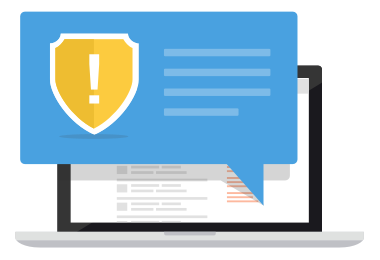

2019-11-23 15:10:22,873 root   DEBUG    Using headers: {'Connection': 'close', 'User-Agent': 'Mozilla/5.0 (X11; U; Linux i686; ko-KR; rv:1.9.2.3) Gecko/20100423 Ubuntu/10.04 (lucid) Firefox/3.6.'}
2019-11-23 15:10:22,874 root   DEBUG    Using proxy: 139.180.143.37:3128 | FreeProxy


RR Status 405
Proxied Request Took: 2.46931791305542 sec => Status: <Response [405]>
	 Response: ip=b'<html>\n  <head>\n    <style type="text/css">\n    input[type="submit"] {\n        margin: 43px 0 74px;\n        padding: 10px 16px;\n        line-height: 1.33;\n        font-size: 14px;\n        font-weight: 400;\n        text-transform: uppercase;\n        color: #FFF;\n        background: #555;\n        border: solid #555;\n        border-width: 0 0 2px 0;\n        border-radius: 2px;\n        transition: all 200ms;\n    }\n        table table {\n      width: 600px !important;\n    }\n    table div { /* logo */\n      width: 100%;\n      float: none;\n      text-align: center;\n    }\n    table div + div { /* main content */\n      width: 100%;\n      float: left;\n      text-align: left;\n    }\n    table div + div + div { /* trace */\n      width: 100%;\n      float: left;\n      text-align: left;\n    }\n    table div + div + div + div { /* footer */\n      width: 100%;\n      fl
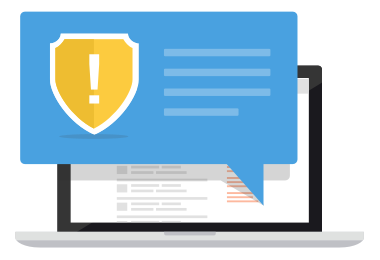

2019-11-23 15:10:35,350 root   DEBUG    Using headers: {'Connection': 'close', 'User-Agent': 'Mozilla/5.0 (X11; U; Linux x86_64; fr; rv:1.9.2.13) Gecko/20101203 Firefox/3.6.1'}
2019-11-23 15:10:35,351 root   DEBUG    Using proxy: 190.53.46.50:40573 | PremProxy
2019-11-23 15:10:40,388 root   DEBUG    Proxy unreachable - Removed Straggling proxy: 190.53.46.50:40573 | PremProxy PL Size = 1758


Proxied Request Took: 5.040797233581543 sec => Status: None
Proxy List Size: 1758
-> Going to sleep..


KeyboardInterrupt: 

In [25]:
import time
from http_request_randomizer.requests.proxy.requestProxy import RequestProxy

start = time.time()
req_proxy = RequestProxy()
print("Initialization took: {0} sec".format((time.time() - start)))
print("Size: {0}".format(len(req_proxy.get_proxy_list())))
print("ALL = {0} ".format(list(map(lambda x: x.get_address(), req_proxy.get_proxy_list()))))

test_url = 'https://www.century21.com/for-sale-homes/Boston-MA-1296c/propertytype_SFR,TOWNHOUSE,MFR'

while True:
    start = time.time()
    request = req_proxy.generate_proxied_request(test_url)
    print("Proxied Request Took: {0} sec => Status: {1}".format((time.time() - start), request.__str__()))
    if request is not None:
        print("\t Response: ip={0}".format(u''.join(request.text).encode('utf-8')))
    print("Proxy List Size: {0}".format(len(req_proxy.get_proxy_list())))

    print("-> Going to sleep..")
    time.sleep(10)